<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   load    2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB
(array([928], dtype=int64),)
3381.1930800000005
3377.9196
8841.66948
8841.66948
training data mean squared error: 0.03403324790027415
Testing data mean squared error: 0.03294856414052122
model parameter: 0.8318863640337814 0.06824676960251944


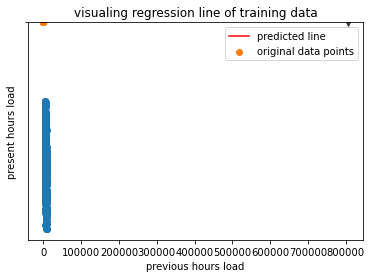

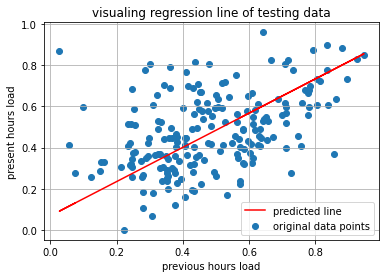

In [ ]:
# ADAGRAD

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import math

load_data = pd.read_excel(r"C:\Users\Krishnasai\Load Data in kW (1) (1).xlsx")
load_data.head()

type(load_data)

data = load_data.rename(columns={5551.82208:'load'},inplace=False)

data.head()

data.shape

data.describe()

data.info()

data.corr()

# VALIDATING NULL VALUE

data.isnull().sum()

# VISUALISING OUTLIERS OF DATA

sns.boxplot(x=data['load'])

from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

#From boxplot and from above zscore calculation, we can conclude that there is one outliner. lets replace it.

data.iloc[928,0] = data.iloc[927,0]

#AFTER REPLACING THE OUTLIER

sns.boxplot(x=data['load'])

#now all outliners are removed and now we are good to train the model

data_x = []
data_y = []
for i in range(0,len(data)-(24*7)):
  data_x.append(data.iloc[i,0])
  data_y.append(data.iloc[i+(24*7),0])

plt.scatter(data_x,data_y)
plt.title("load data visualisation")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()

data_xx = pd.DataFrame(data_x)
min_x = float(data_xx.min())
max_x = float(data_xx.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x)
print(min_y)
print(max_x)
print(max_y)

# DATA NORMALISATION

x = minmax_scale(data_x)
y = minmax_scale(data_y)

data_norm = []
for i in range(len(data)-24*7):
  data_norm.append([x[i],y[i]])

data_norm = pd.DataFrame(data_norm)
data_norm

# SPLITTING DATA SET

from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(data_norm,test_size=0.1)

data_norm.head()

data_x = np.array(data_train[0])

data_y = np.array(data_train[1])

len(data_x)

len(data_test)

#TRAINING THE MODEL

# initalising required variables
max_iters=2000
m=1.0
c=-1.0
Gm=0.0
Gc=0.0
alpha=0.1
exp=10**(-8)
dm=0.0
dc=0.0
iter=1
error=[]

err=0.0
for i in range(len(data_x)):
    gm=-1*(data_y[i]-(m*data_x[i])-c)*data_x[i]
    gc=-1*(data_y[i]-(m*data_x[i])-c)
    err+=(data_y[i]-m*data_x[i]-c)**2
    Gm = Gm + (gm**2)
    Gc = Gc + (gc**2) 
    r1 = math.sqrt(Gm + exp)
    r2 = math.sqrt(Gc + exp)
    dm = -1*(alpha/r1)*gm
    dc = -1*(alpha/r2)*gc
    m = m + dm
    c = c + dc
error.append(err/(2*len(data_x)))
iter=iter+1

len(error)

iters = np.arange(max_iters)

from sklearn.metrics import mean_squared_error

pred = []
for i in range(len(data_train)):
    pred.append(m*data_x[i] + c)

mse_train = mean_squared_error(data_y,pred)

data_test

pred_test = m*data_test[0] + c
mse_test = mean_squared_error(data_test[1],pred_test)

# MEAN SQUARED ERRORS

print("training data mean squared error:",mse_train)
print("Testing data mean squared error:",mse_test)

print("model parameter:",m,c)

#VISUALISING TRAINING DATA

plt.scatter(data_train[0],data_train[1],label="original data points")
plt.plot(data_train[0],pred,color='red',label="predicted line")
plt.title("visualing regression line of training data")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()
plt.legend()
plt.show()

#VISUALISING TESTING DATA

plt.scatter(data_test[0],data_test[1],label="original data points")
plt.plot(data_test[0],pred_test,color='red',label="predicted line")
plt.title("visualing regression line of testing data")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()
plt.legend()
plt.show()

#DEPLOYMENT OF MODEL

input_load = float(input("enter load at this time : "))
input_load = (input_load - min_x)/(max_x-min_x)
output_load = input_load*m+c

output_load = output_load*(max_y-min_y)+min_y

print("predicted load for this hour at next week is : ",output_load)

